# Apple Stock Prediction

In [1]:
#Importing important libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib as plt
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [2]:
#Importing the stock prices dataset
training_dataset = pd.read_csv('apple.csv')
training_dataset

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2010-01-04,213.43,214.5000,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
1,2010-01-05,214.60,215.5900,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2,2010-01-06,214.38,215.2300,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
3,2010-01-07,211.75,212.0000,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
4,2010-01-08,210.30,212.0000,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,2016-12-23,115.59,116.5200,115.59,116.52,14249484.0,0.0,1.0,114.162295,115.080808,114.162295,115.080808,14249484.0
1758,2016-12-27,116.52,117.8000,116.49,117.26,18296855.0,0.0,1.0,115.080808,116.344998,115.051178,115.811668,18296855.0
1759,2016-12-28,117.52,118.0166,116.20,116.76,20905892.0,0.0,1.0,116.068456,116.558923,114.764760,115.317843,20905892.0
1760,2016-12-29,116.45,117.1095,116.40,116.73,15039519.0,0.0,1.0,115.011672,115.663027,114.962290,115.288214,15039519.0


In [3]:
#Checking for null values and returning respective totals
print (training_dataset.isnull().sum())
total_null = training_dataset.isnull().sum().sum()
print ("The total number of null values is: " + str(total_null))

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64
The total number of null values is: 0


In [4]:
#Drop every column except the open, high and low columns
training_dataset.drop(['Date', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
                       'Adj. Volume'], axis = 1, inplace = True)

<AxesSubplot:title={'center':'Apple Stock Prices'}>

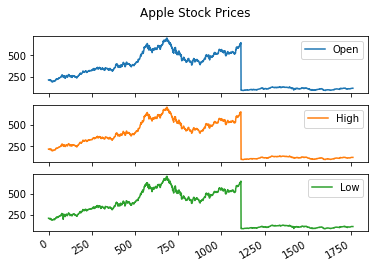

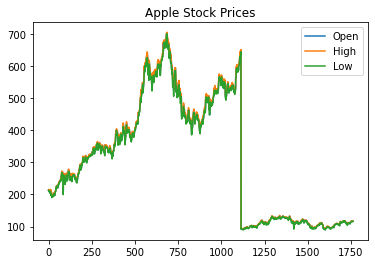

In [5]:
#Visualize the stock price data
training_dataset.plot.line(subplots = True, title='Apple Stock Prices')
training_dataset.plot(title='Apple Stock Prices')

In [6]:
#Drop the high and low columns 
training_dataset.drop(['High', 'Low'], axis = 1, inplace = True)
#Drop the bottom 2 columns
training_dataset.drop(training_dataset.tail(2).index,inplace=True)
print(training_dataset)
print(training_dataset.shape)

        Open
0     213.43
1     214.60
2     214.38
3     211.75
4     210.30
...      ...
1755  116.80
1756  116.35
1757  115.59
1758  116.52
1759  117.52

[1760 rows x 1 columns]
(1760, 1)


In [7]:
#Convert the data into numpy array
train_data = training_dataset.to_numpy()
train_data

array([[213.43],
       [214.6 ],
       [214.38],
       ...,
       [115.59],
       [116.52],
       [117.52]])

In [8]:
#From the dataset, separate into training and testing data with 80/20 percentile 
dataset_train = np.array(train_data[:int(train_data.shape[0]*0.8)])
dataset_test = np.array(train_data[int(train_data.shape[0]*0.8):])
#Find number of columns for each dataset
print(dataset_train.shape)
print(dataset_test.shape)

(1408, 1)
(352, 1)


In [9]:
#Scale the data to range[0,1]
#MinMaxScalar subtracts the minimum value in each feature and divides by the range(difference between original min and max)
scalar = MinMaxScaler(feature_range = (0,1))
train_data = scalar.fit_transform(dataset_train)
train_data.shape

(1408, 1)

In [10]:
#Declare the x_train and y_train 
x_train = train_data[0:1407]
y_train = train_data[1:1408]

x_train = np.reshape(x_train, (1407,1,1))
x_train.shape

(1407, 1, 1)

In [11]:
print(x_train.shape)

(1407, 1, 1)


In [12]:
len(x_train)

1407

In [13]:
print(y_train)

[[0.20318523]
 [0.20282587]
 [0.19852989]
 ...
 [0.04444626]
 [0.03714472]
 [0.04207775]]


In [14]:
x_train[0][0][0]

0.20127409343351854

In [15]:
#Instantiate the Sequential model class 
model = Sequential()
#Set the number of neurons/nodes with the units parameter
#Return_sequences=True reflects adding more layers
model.add(LSTM(units=32, return_sequences=True, input_shape=(1, 1)))
#Add dropout to reduce over-fitting
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
#Add dense layer to reduce spacial parameters of the vector
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             4352      
_________________________________________________________________
dropout (Dropout)            (None, 1, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8

In [16]:
#Compile the model
model.compile(optimizer = 'adam', loss = "mean_squared_error")

In [17]:
#Train the model for 100 epochs with 32 training examples used in each iteration
model.fit(x_train, y_train, epochs = 5, batch_size = 4)

Epoch 1/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0540
Epoch 2/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0111
Epoch 3/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 4/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 5/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0049


In [18]:
#Display the testing dataset
print(dataset_test)
print(dataset_test.shape)

[[114.58 ]
 [116.53 ]
 [117.81 ]
 [112.53 ]
 [116.04 ]
 [114.32 ]
 [116.04 ]
 [116.43 ]
 [116.1  ]
 [114.08 ]
 [110.43 ]
 [ 94.87 ]
 [111.11 ]
 [107.085]
 [112.25 ]
 [112.17 ]
 [112.13 ]
 [110.18 ]
 [110.   ]
 [112.49 ]
 [108.97 ]
 [111.65 ]
 [113.76 ]
 [110.27 ]
 [111.79 ]
 [116.58 ]
 [115.93 ]
 [116.25 ]
 [115.66 ]
 [112.21 ]
 [113.67 ]
 [113.38 ]
 [113.63 ]
 [113.25 ]
 [116.44 ]
 [113.85 ]
 [112.83 ]
 [110.17 ]
 [109.07 ]
 [108.01 ]
 [109.88 ]
 [110.63 ]
 [111.74 ]
 [110.19 ]
 [110.   ]
 [112.73 ]
 [110.82 ]
 [111.29 ]
 [110.93 ]
 [111.78 ]
 [110.8  ]
 [111.34 ]
 [114.   ]
 [114.33 ]
 [116.7  ]
 [118.08 ]
 [115.4  ]
 [116.93 ]
 [118.7  ]
 [120.99 ]
 [119.87 ]
 [120.79 ]
 [123.13 ]
 [121.85 ]
 [121.11 ]
 [120.96 ]
 [116.9  ]
 [116.37 ]
 [116.26 ]
 [115.2  ]
 [111.38 ]
 [114.92 ]
 [115.76 ]
 [117.64 ]
 [119.2  ]
 [119.27 ]
 [117.33 ]
 [119.21 ]
 [118.29 ]
 [117.99 ]
 [118.75 ]
 [117.05 ]
 [116.55 ]
 [115.29 ]
 [118.98 ]
 [117.52 ]
 [117.64 ]
 [116.04 ]
 [115.19 ]
 [112.18 ]
 [111.94 ]

In [19]:
#Reshape the training data and scale
inputs = np.reshape(scalar.transform(dataset_test), (352,1,1))
#Reverse the scaled predictions to their original values  
stock_prediction = scalar.inverse_transform(model.predict(inputs))
stock_prediction

array([[124.47078 ],
       [126.21457 ],
       [127.36149 ],
       [122.64204 ],
       [125.77599 ],
       [124.23856 ],
       [125.77599 ],
       [126.12505 ],
       [125.82969 ],
       [124.02431 ],
       [120.773476],
       [107.08152 ],
       [121.37799 ],
       [117.80722 ],
       [122.39261 ],
       [122.32137 ],
       [122.28574 ],
       [120.551346],
       [120.39147 ],
       [122.6064  ],
       [119.477264],
       [121.85844 ],
       [123.73872 ],
       [120.63131 ],
       [121.98304 ],
       [126.25933 ],
       [125.67758 ],
       [125.96392 ],
       [125.43606 ],
       [122.35699 ],
       [123.65841 ],
       [123.399734],
       [123.622734],
       [123.28378 ],
       [126.13399 ],
       [123.81903 ],
       [122.909355],
       [120.54249 ],
       [119.56596 ],
       [118.626236],
       [120.28489 ],
       [120.95122 ],
       [121.93853 ],
       [120.56025 ],
       [120.39147 ],
       [122.820244],
       [121.12012 ],
       [121.5

In [114]:
stock_prediction = np.squeeze(stock_prediction)
stock_prediction

array([116.820854, 118.65478 , 119.86071 , 114.89705 , 118.19358 ,
       116.576614, 118.19358 , 118.56064 , 118.25003 , 116.35122 ,
       112.930824,  98.50553 , 113.56702 , 109.80833 , 114.63463 ,
       114.559654, 114.52218 , 112.69705 , 112.52878 , 114.85955 ,
       111.566505, 114.07256 , 116.05081 , 112.78121 , 114.20368 ,
       118.70185 , 118.09009 , 118.3912  , 117.836075, 114.59714 ,
       115.966324, 115.69421 , 115.9288  , 115.57224 , 118.57006 ,
       116.13529 , 115.1783  , 112.687706, 111.65989 , 110.67064 ,
       112.41662 , 113.117874, 114.15682 , 112.70638 , 112.52878 ,
       115.08455 , 113.29562 , 113.735504, 113.39857 , 114.19431 ,
       113.276924, 113.78228 , 116.27611 , 116.586   , 118.81484 ,
       120.1153  , 117.59155 , 119.031456, 120.700195, 122.86388 ,
       121.804985, 122.67469 , 124.89061 , 123.6778  , 122.9774  ,
       122.835495, 119.00319 , 118.50416 , 118.40061 , 117.40352 ,
       113.81975 , 117.140335, 117.930145, 119.70045 , 121.172

In [115]:
stock_prediction = stock_prediction.reshape(-1,1)
stock_prediction

array([[116.820854],
       [118.65478 ],
       [119.86071 ],
       [114.89705 ],
       [118.19358 ],
       [116.576614],
       [118.19358 ],
       [118.56064 ],
       [118.25003 ],
       [116.35122 ],
       [112.930824],
       [ 98.50553 ],
       [113.56702 ],
       [109.80833 ],
       [114.63463 ],
       [114.559654],
       [114.52218 ],
       [112.69705 ],
       [112.52878 ],
       [114.85955 ],
       [111.566505],
       [114.07256 ],
       [116.05081 ],
       [112.78121 ],
       [114.20368 ],
       [118.70185 ],
       [118.09009 ],
       [118.3912  ],
       [117.836075],
       [114.59714 ],
       [115.966324],
       [115.69421 ],
       [115.9288  ],
       [115.57224 ],
       [118.57006 ],
       [116.13529 ],
       [115.1783  ],
       [112.687706],
       [111.65989 ],
       [110.67064 ],
       [112.41662 ],
       [113.117874],
       [114.15682 ],
       [112.70638 ],
       [112.52878 ],
       [115.08455 ],
       [113.29562 ],
       [113.7

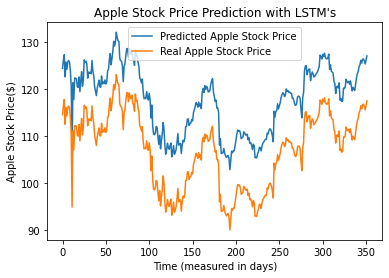

In [20]:
#Graph the real stock prices against the model's prediction
plt.plot(stock_prediction, label = 'Predicted Apple Stock Price', linewidth = 1.5)
plt.plot(dataset_test, label = 'Real Apple Stock Price', linewidth = 1.5)
plt.title("Apple Stock Price Prediction with LSTM's")
plt.xlabel('Time (measured in days)')
plt.ylabel('Apple Stock Price($)')
plt.legend()
plt.show()

In [117]:
#Calculate the standard deviation of the residuals
rmse_value = math.sqrt(mean_squared_error(dataset_test, stock_prediction))
rmse_value = round(rmse_value, 3)
print(rmse_value)

2.809


In [118]:
#Extrapolate the minimum and maximum real stock price values
maxValTest = round(float(max(dataset_test)), 2)
minValTest = round(float(min(dataset_test)), 2)
print ("The real maximum stock price is: " + str(maxValTest) +" dollars")
print ("The real minimum stock price is: " + str(minValTest) + " dollars")

The real maximum stock price is: 123.13 dollars
The real minimum stock price is: 90.0 dollars


In [119]:
#Extrapolate the minimum and maximum real stock price values
maxValPredict = round(float(max(stock_prediction)), 2)
minValPredict = round(float(min(stock_prediction)), 2)
print ("The predicted maximum stock price is: " + str(maxValPredict) +" dollars")
print ("The predicted minimum stock price is: " + str(minValPredict) +" dollars")

The predicted maximum stock price is: 124.89 dollars
The predicted minimum stock price is: 94.04 dollars


In [120]:
#Calculate error and model accuracy with MAPE
total = 0
for i, j in zip(dataset_test, stock_prediction):
    value = abs(i - j) / abs(i)
    total += value
error = float(total*100/(len(dataset_test))) #calculate mape
mape = round(error, 1) #round to 3 significant figures
accuracy = 100 - mape #Calculate accuracy
print ("The LSTM's accuracy in predicting the stock price is: " + str(accuracy) + "%")

The LSTM's accuracy in predicting the stock price is: 97.4%
